# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$\textrm{f}(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You shall generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [3]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [4]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    f = ((1-x)**2)+100*(y-x**2)**2
    return f
    
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    gradient = [(2*x) - 2 + 400*(x**3) - 400*y*x, 200*y - 200*(x**2)]
    return gradient

Before proceeding, ensure that your functions have been written correctly:

In [5]:
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [6]:
def gradientDescent(df, r0, eta, nstep):
    x, y = r0
    history = numpy.empty((nstep+1,2))
    history[0] = [x,y]
    for i in range(1,nstep+1):
        history[i]=[history[i-1,0]-df([history[i-1,0],history[i-1,1]])[0]*eta,history[i-1,1]-df([history[i-1,0],history[i-1,1]])[1]*eta]
    return history

Test your answer:

In [7]:
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$.

Text(0,0.5,'y dimension')

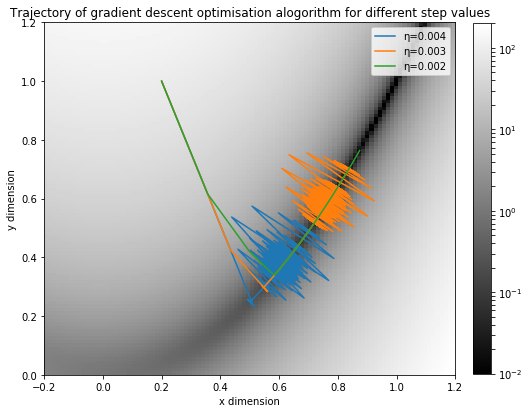

In [9]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point
Traj1 = gradientDescent(grad, r0, 0.004, 1000)
Traj2 = gradientDescent(grad, r0, 0.003, 1000)
Traj3 = gradientDescent(grad, r0, 0.002, 1000)
plt.plot(Traj1[:,0],Traj1[:,1],label="η=0.004")
plt.plot(Traj2[:,0],Traj2[:,1],label="η=0.003")
plt.plot(Traj3[:,0],Traj3[:,1],label="η=0.002")
plt.legend(loc='best')
plt.title("Trajectory of gradient descent optimisation alogorithm for different step values")
matplotlib.pyplot.xlabel("x dimension")
matplotlib.pyplot.ylabel("y dimension")

Which of the three step size $\eta$ is best?

0.002, because it gets closer to the value we're looking for. Even though we would expect to get there quicker with larger steps (0.003 and 0.004) we actually get closer using 0.002 because 0.003 and 0.004's trajectories stray out of the "valley" multiple times as they oscillate much more than 0.002's.